In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammedfarag22","key":"4a96180bf93d595065dd579253814eda"}'}

In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 73.8MB/s]
100% 15.3M/15.3M [00:00<00:00, 109MB/s] 


In [7]:
! unzip digit-recognizer.zip -d digit-recognizer



Archive:  digit-recognizer.zip
  inflating: digit-recognizer/sample_submission.csv  
  inflating: digit-recognizer/test.csv  
  inflating: digit-recognizer/train.csv  


In [85]:
# Load the data
train = pd.read_csv("/content/digit-recognizer/train.csv")
test = pd.read_csv("/content/digit-recognizer/test.csv")

In [20]:
train.shape

(42000, 785)

In [21]:
test.shape


(28000, 784)

In [22]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

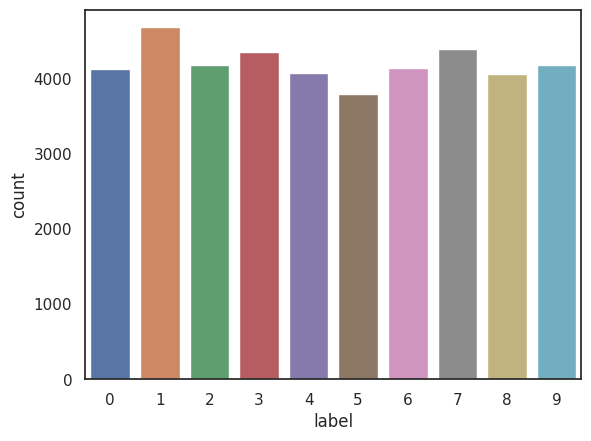

In [86]:
Y = train["label"]

# Drop 'label' column
X = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(x=Y)

Y.value_counts()

In [87]:
X.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

# **Normalization**

In [88]:
X = X / 255.0
test = test / 255.0

In [46]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
X.shape

(42000, 784)

In [106]:

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [107]:
X.shape

(42000, 28, 28, 1)

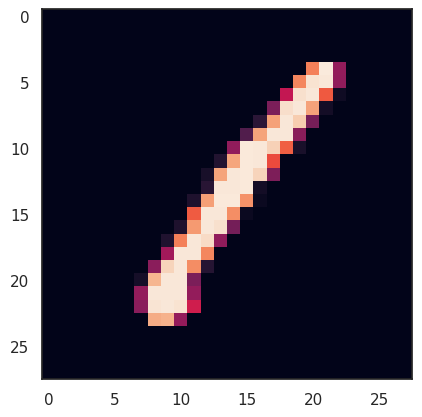

In [108]:
plt.imshow(X[0])

In [59]:
Y = to_categorical(Y, num_classes = 10)
Y

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [110]:
random_seed =2

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state=random_seed)


In [84]:
#g = plt.imshow(X_train[0])
#X[0].shape
y_train[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [112]:
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [117]:
model.compile(optimizer = "SGD" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [118]:
model.fit(X_train, y_train , epochs = 10)

Epoch 1/10
985/985 [==============================] - 248s 251ms/step - loss: 1.0191 - accuracy: 0.6532
Epoch 2/10
985/985 [==============================] - 242s 246ms/step - loss: 0.2516 - accuracy: 0.9219
Epoch 3/10
985/985 [==============================] - 241s 245ms/step - loss: 0.1659 - accuracy: 0.9488
Epoch 4/10
985/985 [==============================] - 244s 248ms/step - loss: 0.1324 - accuracy: 0.9594
Epoch 5/10
985/985 [==============================] - 234s 238ms/step - loss: 0.1123 - accuracy: 0.9657
Epoch 6/10
985/985 [==============================] - 238s 242ms/step - loss: 0.1005 - accuracy: 0.9681
Epoch 7/10
985/985 [==============================] - 240s 243ms/step - loss: 0.0905 - accuracy: 0.9722
Epoch 8/10
985/985 [==============================] - 239s 243ms/step - loss: 0.0828 - accuracy: 0.9738
Epoch 9/10
985/985 [==============================] - 238s 242ms/step - loss: 0.0750 - accuracy: 0.9771
Epoch 10/10
985/985 [==============================] - 238s 242m

In [119]:
model.evaluate(X_test,y_test)

329/329 [==============================] - 19s 56ms/step - loss: 0.0478 - accuracy: 0.9845


[0.047809720039367676, 0.9844762086868286]

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

In [124]:
predicts = model.predict(X_test)

329/329 [==============================] - 21s 64ms/step


In [125]:
classes = [np.argmax(element) for element in predicts]
classes[:5]

[6, 9, 5, 7, 9]

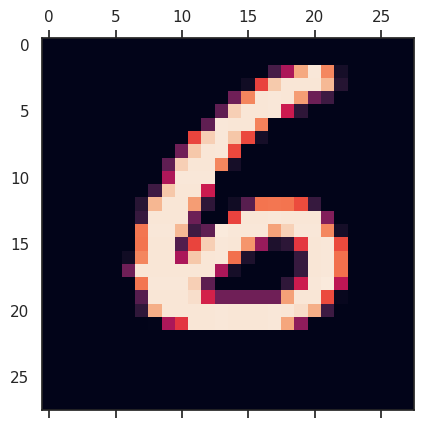

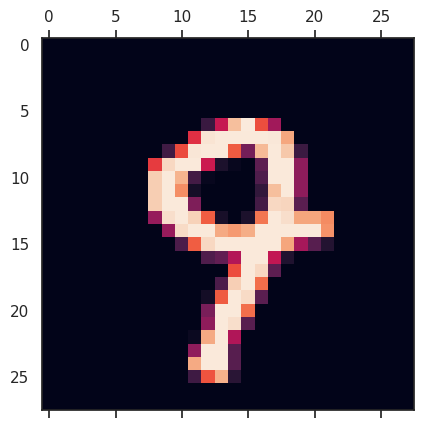

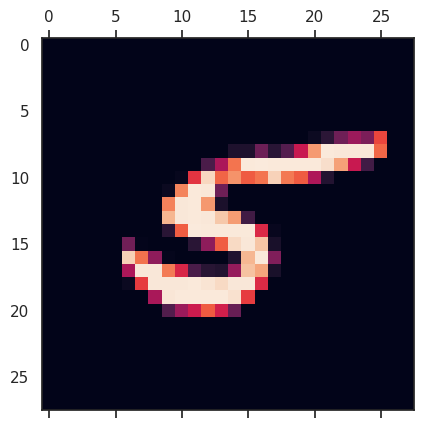

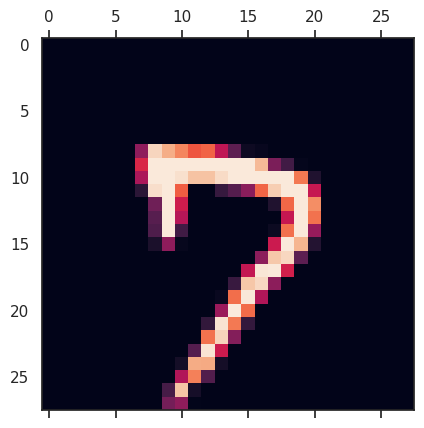

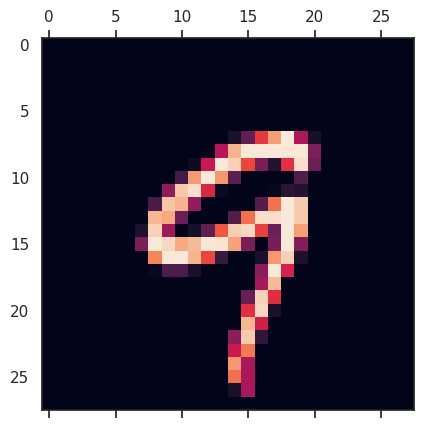

In [127]:
for i in range(5):
 plt.matshow(X_test[i])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)



In [143]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.994, Test: 0.987


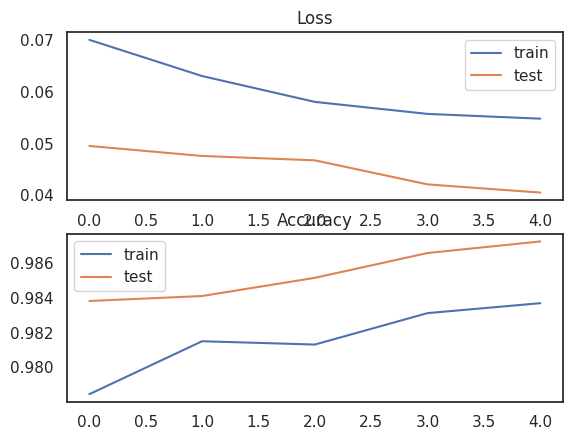

In [144]:
import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

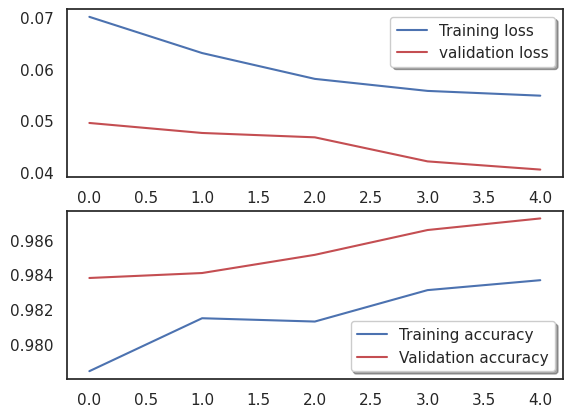

In [147]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [140]:

from sklearn.metrics import classification_report
print(classification_report(y_test,classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1030
           1       0.99      0.99      0.99      1224
           2       0.99      0.98      0.98      1031
           3       0.99      0.98      0.98      1076
           4       0.98      0.99      0.99      1053
           5       0.99      0.99      0.99       934
           6       0.99      0.99      0.99      1029
           7       0.97      0.99      0.98      1089
           8       0.98      0.98      0.98       989
           9       0.99      0.95      0.97      1045

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



In [150]:
Y_pred_classes = np.argmax(predicts,axis = 1)  

Text(91.25, 0.5, 'Truth')

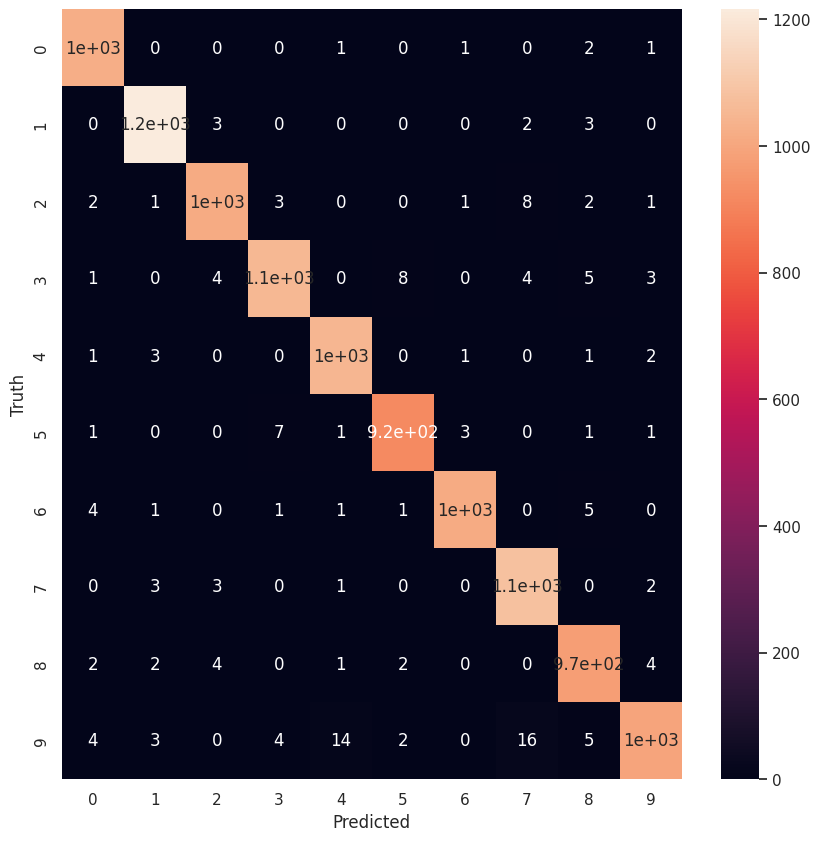

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_classes)
# cm = confusion_matrix(y_test, classes)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

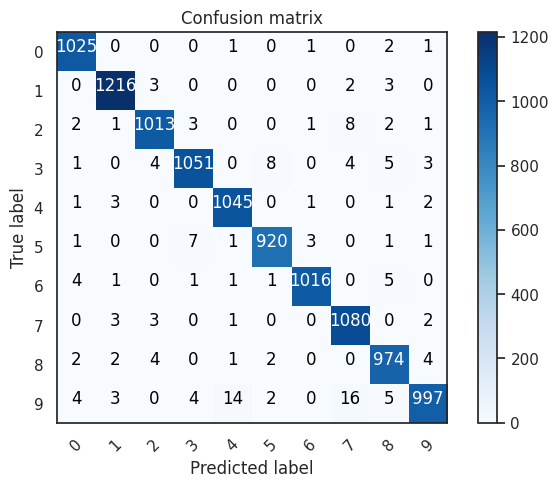

In [158]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred_classes = np.argmax(predicts,axis = 1) 
# Convert validation observations to one hot vectors 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 
